In [5]:
#this notebook do the feature engineer
#basically follow this kernel
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import norm, skew
%matplotlib inline

read data

In [13]:
df_train=pd.read_csv('./data/train.csv')
df_test=pd.read_csv('./data/test.csv')
df_train_id=df_train['Id']
df_test_id=df_test['Id']
df_test.drop("Id",axis=1,inplace=True)
df_train.drop("Id",axis=1,inplace=True)
#train target
df_y=df_train.SalePrice.values
#all data
all_data=pd.concat((df_train,df_test)).reset_index(drop=True)

In [14]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

remove the skew 

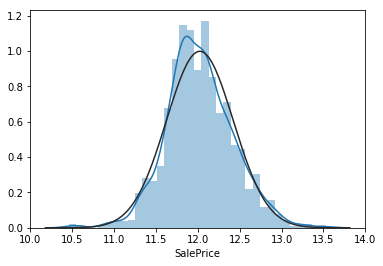

In [15]:
df_train["SalePrice"]=np.log1p(df_train["SalePrice"])
sns.distplot(df_train["SalePrice"],fit=norm)

In [38]:
df_missing_ratio=all_data.isnull().sum(0)/len(all_data)
df_missing_ratio.sort_values(ascending=False,inplace=True)
df_missing_ratio=df_missing_ratio>0.15
# if missing more than 0.15, then drop it
all_data.drop(df_missing_ratio.index.values[df_missing_ratio.values],1,inplace=True)
# replace no garage* with 0 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#adding a new feature (sum of area)

In [41]:
all_data['TotalSF']=all_data.TotalBsmtSF+all_data['1stFlrSF']+all_data['2ndFlrSF']

In [46]:
numeric_f=all_data.dtypes[all_data.dtypes != "object"].index
str_f=all_data.dtypes[all_data.dtypes == "object"].index